#### Bellman and Dijkstra's Algorithms

Bellman-Ford Shortest distances from node 0: [0, -1, 2, -2, 1]
Dijkstra's Shortest distances from node 0: {0: 0, 1: -1, 2: 2, 3: -2, 4: 1}


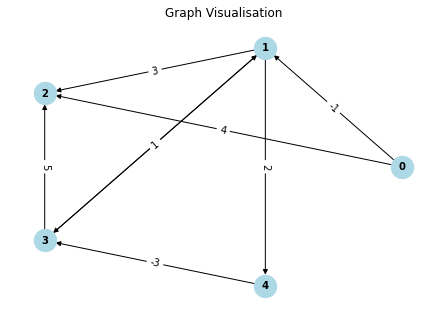

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import heapq

def create_graph(vertices):
    edges = []
    adj_list = {i: [] for i in range(vertices)}
    return {"V": vertices, "edges": edges, "adj_list": adj_list}

def add_edge(graph, u, v, weight):
    graph["edges"].append((u, v, weight))
    graph["adj_list"][u].append((v, weight))

def bellman_ford(graph, source):
    V = graph["V"]
    edges = graph["edges"]
    dist = [float('inf')] * V
    dist[source] = 0

    for _ in range(V - 1):
        for u, v, w in edges:
            if dist[u] != float('inf') and dist[u] + w < dist[v]:
                dist[v] = dist[u] + w

    for u, v, w in edges:
        if dist[u] != float('inf') and dist[u] + w < dist[v]:
            print("⚠ Graph contains a negative-weight cycle")
            return None

    return dist

def dijkstra(graph, source):
    V = graph["V"]
    adj_list = graph["adj_list"]
    dist = {i: float('inf') for i in range(V)}
    dist[source] = 0

    pq = [(0, source)]

    while pq:
        current_dist, u = heapq.heappop(pq)

        if current_dist > dist[u]:
            continue

        for v, weight in adj_list[u]:
            new_dist = dist[u] + weight
            if new_dist < dist[v]:
                dist[v] = new_dist
                heapq.heappush(pq, (new_dist, v))

    return dist

def draw_graph(graph):
    G = nx.DiGraph()
    for u, v, w in graph["edges"]:
        G.add_edge(u, v, weight=w)

    pos = nx.shell_layout(G)
    edge_labels = {(u, v): w for u, v, w in graph["edges"]}

    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500,
            font_size=10, font_weight='bold', arrows=True)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

    plt.title("Graph Visualisation")
    plt.show()


# Example Usage
graph = create_graph(5)

add_edge(graph, 0, 1, -1)
add_edge(graph, 0, 2, 4)
add_edge(graph, 1, 2, 3)
add_edge(graph, 1, 3, 2)
add_edge(graph, 1, 4, 2)
add_edge(graph, 3, 2, 5)
add_edge(graph, 3, 1, 1)
add_edge(graph, 4, 3, -3)

source = 0

# Bellman-Ford
bf_result = bellman_ford(graph, source)
if bf_result:
    print(f"Bellman-Ford Shortest distances from node {source}: {bf_result}")

# Dijkstra
dijkstra_result = dijkstra(graph, source)
if dijkstra_result:
    print(f"Dijkstra's Shortest distances from node {source}: {dijkstra_result}")

# Draw graph
draw_graph(graph)

